           CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF      NM_UF   CD_MUN  \
0   350010505000001  0.123823         3   Sudeste    35  São Paulo  3500105   
1   350010505000002  0.202614         3   Sudeste    35  São Paulo  3500105   
2   350010505000003  0.235051         3   Sudeste    35  São Paulo  3500105   
3   350010505000004  0.288466         3   Sudeste    35  São Paulo  3500105   
4   350010505000005  0.213725         3   Sudeste    35  São Paulo  3500105   
5   350010505000006  0.179527         3   Sudeste    35  São Paulo  3500105   
6   350010505000007  0.129225         3   Sudeste    35  São Paulo  3500105   
7   350010505000008  0.157545         3   Sudeste    35  São Paulo  3500105   
8   350010505000009  0.105312         3   Sudeste    35  São Paulo  3500105   
9   350010505000010  0.132245         3   Sudeste    35  São Paulo  3500105   
10  350010505000012  0.559550         3   Sudeste    35  São Paulo  3500105   
11  350010505000013  0.154923         3   Sudeste   

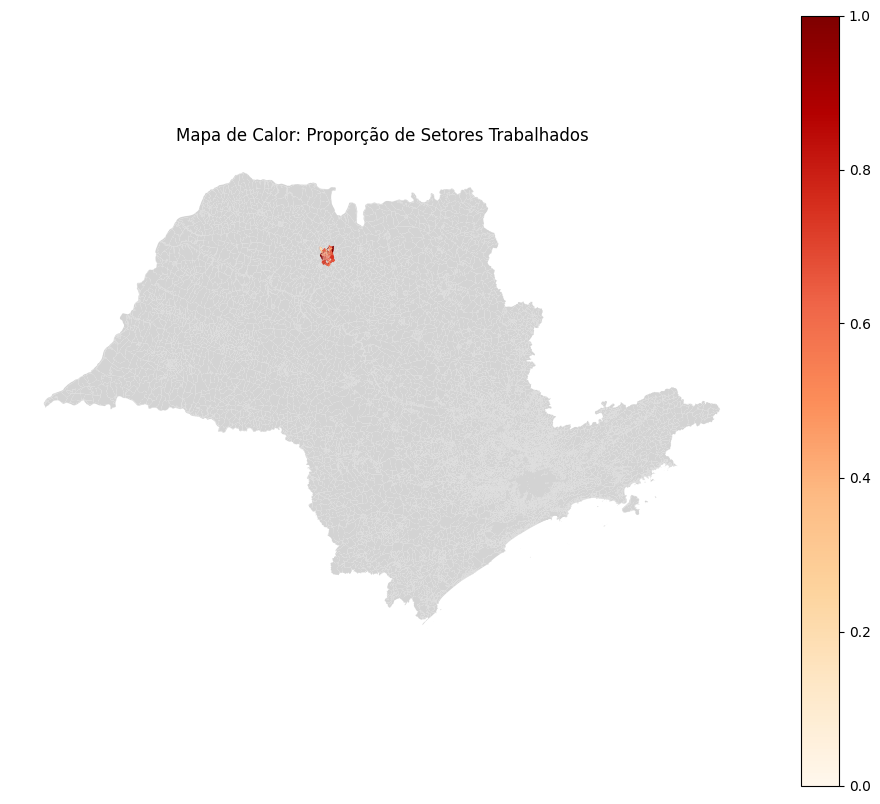

In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados geográficos (SHP) e os dados do CSV
shp_path = 'C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/shapefile/SP_Malha_Preliminar_2022.shp'  # Caminho para o arquivo SHP
csv_path = 'C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/SAO_JOSE_DO_RIO_PRETO_tipo_4_dados_6m_execfalse.csv'  # Caminho para o arquivo CSV

# Carregar os dados geográficos (SHP)
gdf = gpd.read_file(shp_path)

# Remover o caractere 'P' no final da coluna 'CD_SETOR' e converter para int
gdf['CD_SETOR'] = gdf['CD_SETOR'].str.rstrip('P').astype(int)

# Exibir as primeiras linhas para verificação
print(gdf.head(20))

# Carrega os dados do CSV em um DataFrame
df_csv = pd.read_csv(csv_path)

# Verifica e converte os tipos das colunas de chave para garantir que sejam do mesmo tipo
gdf['CD_SETOR'] = gdf['CD_SETOR'].astype(str)
df_csv['censitario'] = df_csv['censitario'].astype(str)

# Realiza o merge dos dois DataFrames com base nos códigos dos setores censitários
merged = gdf.merge(df_csv, left_on='CD_SETOR', right_on='censitario', how='left')

# Calcula a proporção desejada
merged['proporcao_trabalhados'] = merged['trabalhados'] / (merged['trabalhados'] + merged['nao_trabalhados'])

# Configura o tamanho e estilo do gráfico
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Plota o mapa de calor usando a proporção calculada
merged.plot(column='proporcao_trabalhados', 
            ax=ax, 
            legend=True, 
            cmap='OrRd', 
            missing_kwds={'color': 'lightgrey', "label": "Dados não disponíveis"})

# Remove os eixos para melhorar a visualização
ax.set_axis_off()

# Define o título do mapa
plt.title('Mapa de Calor: Proporção de Setores Trabalhados')

# Mostra o mapa
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'dados.csv'

Original CRS: GEOGCS["SIRGAS 2000",DATUM["D_unnamed",SPHEROID["GRS_1980_EPSG_ID_7019",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Updated CRS: GEOGCS["SIRGAS 2000",DATUM["D_unnamed",SPHEROID["GRS_1980_EPSG_ID_7019",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Merged GeoDataFrame CRS: GEOGCS["SIRGAS 2000",DATUM["D_unnamed",SPHEROID["GRS_1980_EPSG_ID_7019",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


C:\Users\celso\AppData\Local\Temp\ipykernel_13392\3182616663.py:44: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.plot(column='taxa_trabalhados', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', aspect='equal')


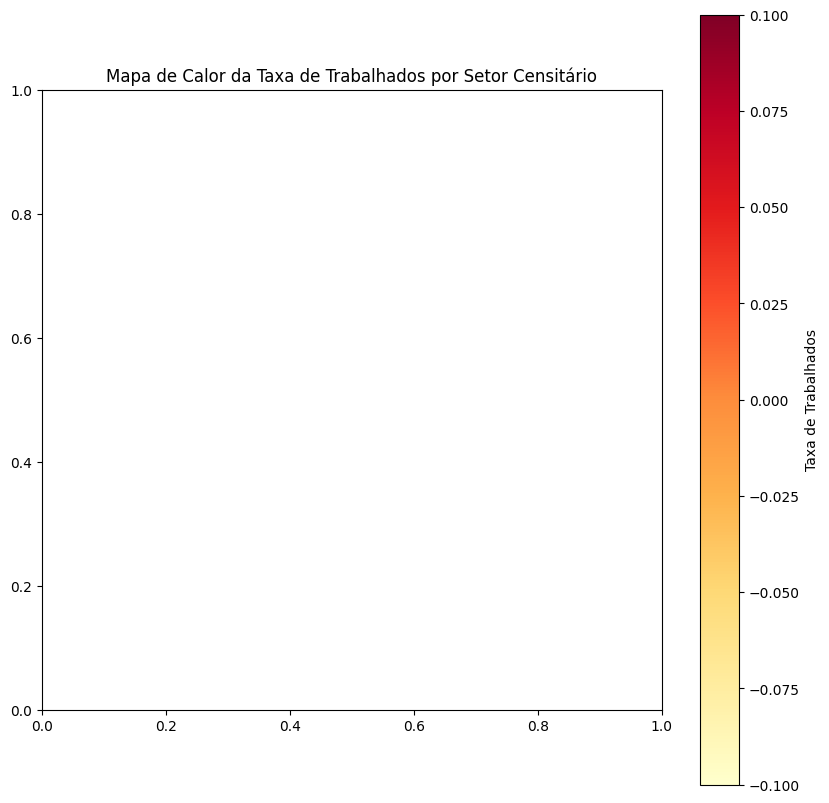

Second Merged GeoDataFrame CRS: GEOGCS["SIRGAS 2000",DATUM["D_unnamed",SPHEROID["GRS_1980_EPSG_ID_7019",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


C:\Users\celso\AppData\Local\Temp\ipykernel_13392\3182616663.py:80: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf2.plot(column='taxa_trabalhados', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', aspect='equal')


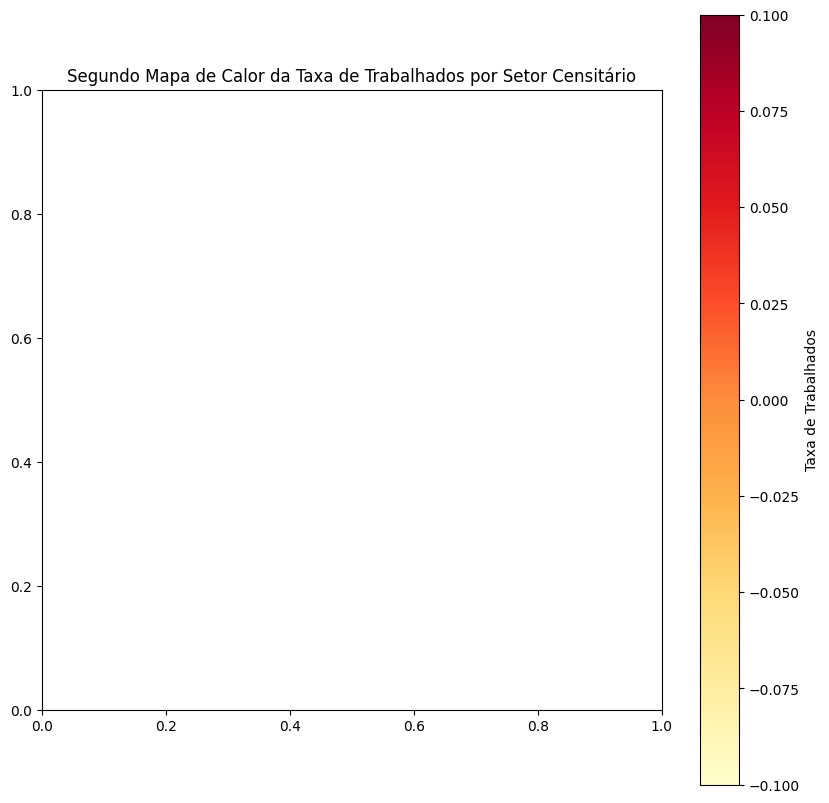

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Paths to your data
shp_path = 'C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/shapefile/SP_Malha_Preliminar_2022.shp'
csv_path = 'C:/Users/celso/Desktop/WIKI_DENGUE/lab-soft-wiki/encyclopedia/data_analytics/SAO_JOSE_DO_RIO_PRETO_tipo_4_dados_6m_execfalse.csv'

# Load the geographic data (SHP)
gdf_original = gpd.read_file(shp_path)
print("Original CRS:", gdf_original.crs)

# If CRS is not set, set it to the correct CRS (replace 'EPSG:XXXXX' with the correct code)
if gdf_original.crs is None:
    gdf_original.set_crs('EPSG:31983', inplace=True)  # Example EPSG code for Brazil UTM zone 23S

# Alternatively, if you know the correct CRS, you can set it explicitly
# gdf_original.set_crs('EPSG:31983', inplace=True)  # Replace 'EPSG:31983' with your CRS

print("Updated CRS:", gdf_original.crs)

# Load the CSV data
df = pd.read_csv(csv_path)

# Convert the 'censitario' column to string
df['censitario'] = df['censitario'].astype(str)

# Calculate the 'taxa_trabalhados'
df['taxa_trabalhados'] = df['trabalhados'] / (df['trabalhados'] + df['nao_trabalhados'])

# Remove null and invalid geometries from the shapefile
gdf_original = gdf_original[gdf_original['geometry'].notnull()]
gdf_original = gdf_original[gdf_original.is_valid]

# Merge the CSV data with the geographic data
gdf = gdf_original.merge(df, left_on='CD_SETOR', right_on='censitario')

# **Re-assign the CRS to the merged GeoDataFrame**
gdf.set_crs(gdf_original.crs, inplace=True)
print("Merged GeoDataFrame CRS:", gdf.crs)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='taxa_trabalhados', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', aspect='equal')

# Add title and color bar
plt.title("Mapa de Calor da Taxa de Trabalhados por Setor Censitário")

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=gdf['taxa_trabalhados'].min(), vmax=gdf['taxa_trabalhados'].max()))
sm._A = []  # Necessary for the color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Taxa de Trabalhados')

# Show the map
plt.show()

# --- Second Plot ---

# Reload the geographic data (SHP)
gdf_original = gpd.read_file(shp_path)

# Ensure CRS is set
if gdf_original.crs is None:
    gdf_original.set_crs('EPSG:31983', inplace=True)  # Replace with your CRS

# Remove null and invalid geometries
gdf_original = gdf_original[gdf_original['geometry'].notnull()]
gdf_original = gdf_original[gdf_original.is_valid]

# Merge the data again
gdf2 = gdf_original.merge(df, left_on='CD_SETOR', right_on='censitario')

# Re-assign CRS to the merged GeoDataFrame
gdf2.set_crs(gdf_original.crs, inplace=True)
print("Second Merged GeoDataFrame CRS:", gdf2.crs)

# Plot the second heatmap
fig, ax = plt.subplots(figsize=(10, 10))
gdf2.plot(column='taxa_trabalhados', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', aspect='equal')

# Add title and color bar
plt.title("Segundo Mapa de Calor da Taxa de Trabalhados por Setor Censitário")

# Add a color bar
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=gdf2['taxa_trabalhados'].min(), vmax=gdf2['taxa_trabalhados'].max()))
sm._A = []  # Necessary for the color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Taxa de Trabalhados')

# Show the second map
plt.show()


ValueError: aspect must be finite and positive 

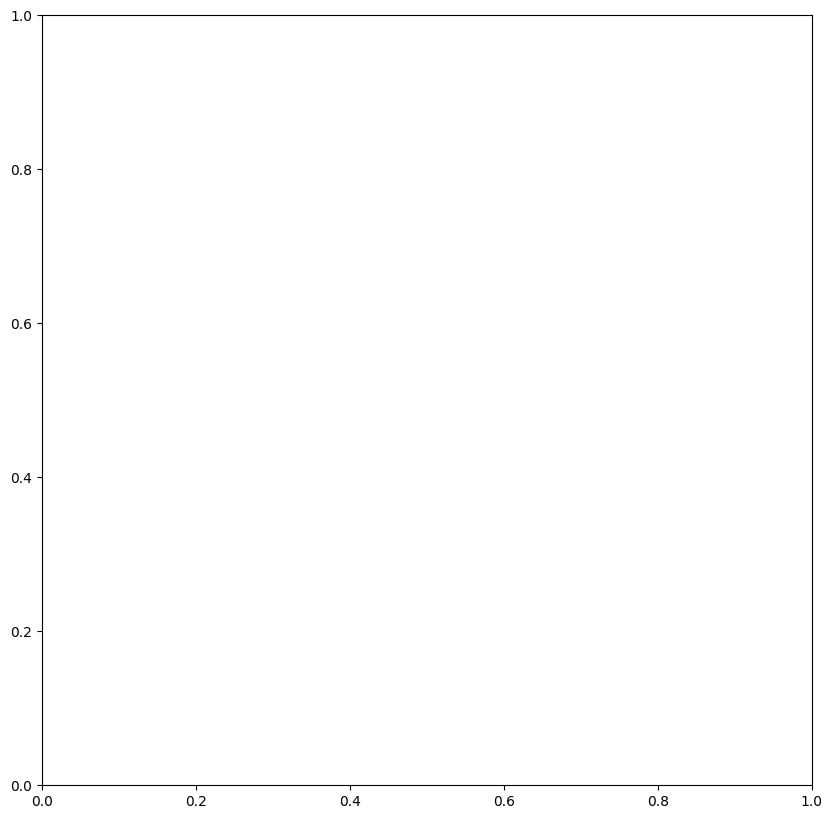

In [ ]:
# Carregar os dados do CSV
df = pd.read_csv(csv_path)

# Converter a coluna censitario para string
df['censitario'] = df['censitario'].astype(str)

# Remover geometrias nulas e inválidas do shapefile
gdf = gdf[gdf['geometry'].notnull()]
gdf = gdf[gdf.is_valid]

# Calcular a taxa de trabalhados / (trabalhados + não trabalhados)
df['taxa_trabalhados'] = df['trabalhados'] / (df['trabalhados'] + df['nao_trabalhados'])

# Unir os dados CSV com os dados geográficos utilizando o campo em comum
gdf = gdf.merge(df, left_on='CD_SETOR', right_on='censitario')

# Plotar o mapa de calor
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')  # Define o aspecto para 'equal' para evitar o erro
gdf.plot(column='taxa_trabalhados', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Adicionar título e barra de cores
plt.title("Mapa de Calor da Taxa de Trabalhados por Setor Censitário")

# Adicionar uma barra de cores
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=gdf['taxa_trabalhados'].min(), vmax=gdf['taxa_trabalhados'].max()))
sm._A = []  # Necessário para a barra de cores
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Taxa de Trabalhados')

# Mostrar o mapa
plt.show()

